In [2]:
#Audio and Music processing Lab: Mapping genre taxonomies
#Tiange Zhu, Feb/2019

#!pip install pandas
#!pip install scipy
#!pip install sklearn

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
#from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
#######################################################################################
#Task1: Find the intersection of the four datasets, get their recording musicbrainz id.

#Task2: Adding sourcename as prefix to all the genres, make them appear as "sourcename---genre---subgenre".
#######################################################################################

#TAGTRAUM
#Reading files, the data structure is dataframe
tagtraum = pd.read_csv("acousticbrainz-mediaeval2017-tagtraum-train.tsv", sep ='\t', dtype=str)

print("The number of tracks in tagtraum dataset:")
print(len(tagtraum))

#Get the id list of tagtraum for later use
tagtraumid = tagtraum["recordingmbid"].tolist()

#----------------------------------------
#LASTFM

lastfm = pd.read_csv("acousticbrainz-mediaeval2017-lastfm-train.tsv", sep='\t', dtype=str)

print("The number of tracks in lastfm dataset:")
print(len(lastfm))

#Set index
#lastfm.set_index('recordingmbid')

#Only keep the intersection part in lastfm dataset
lastfm = lastfm[lastfm["recordingmbid"].isin(tagtraumid)]

#Now lastfmid is the id list of intersection of lastfm and tagtraum
lastfmid = lastfm["recordingmbid"].tolist()

#----------------------------------------
#DISCOGS

discogs = pd.read_csv("acousticbrainz-mediaeval2017-discogs-train.tsv", sep='\t', dtype=str)
print("The number of tracks in discogs dataset:")
print(len(discogs))

#
#Abandoned......Another way to use pandas to get intersection:
#discogs.set_index('recordingmbid')
#ids = lastfm.index.intersection(discogs.index)
#idlist = ids.tolist()
#print("The length of the intersection is:")
#print(len(ids))
#

#Only keep the ids that's in the intersection
discogs = discogs[discogs["recordingmbid"].isin(lastfmid)]

#Now the discogsid list is the intersection of tagtraum, lastfm and discogs
discogsid = discogs["recordingmbid"].tolist()

#-----------------------------------
#ALLMUSIC

#Reading files from allmusic
allmusic = pd.read_csv("acousticbrainz-mediaeval2017-allmusic-train.tsv", sep='\t', dtype=str)
print("The number of tracks in allmusic dataset:")
print(len(allmusic))
#Get the final intersection
allmusic = allmusic[allmusic["recordingmbid"].isin(discogsid)]

#Set the musicbrainzids as index for Allmusic
#allmusic.set_index('recordingmbid')

#Get the final id list of the intersection
idlist = allmusic["recordingmbid"].tolist()

print("The number of tracks in the final intersection is:")
print(len(idlist))

#Delete the redundant column
allmusic = allmusic.drop("releasegroupmbid",axis = 1)

#Delete empty columns
na_columns = allmusic.columns[allmusic.isna().all()].tolist()
allmusic = allmusic.drop(na_columns, axis=1)

#Set index
allmusic.set_index("recordingmbid", inplace=True)

#Put prefix to everything
allmusic = allmusic.applymap(lambda x: 'allmusic---{}'.format(x))

##Remove redundant prefix from "recordingmbid" column
#allmusic['recordingmbid'] = allmusic['recordingmbid'].apply(lambda x: x.replace('allmusic---','').format(x))

#For other three dataset, only keep the intersection part
#Then add prefix, delete the redundant column

discogs = discogs[discogs["recordingmbid"].isin(idlist)]
discogs = discogs.drop("releasegroupmbid",axis = 1)
na_columns = discogs.columns[discogs.isna().all()].tolist()
discogs = discogs.drop(na_columns, axis=1)
discogs.set_index("recordingmbid", inplace=True)
discogs = discogs.applymap(lambda x: 'discogs---{}'.format(x))
#discogs['recordingmbid'] = discogs['recordingmbid'].apply(lambda x: x.replace('discogs---','').format(x))

lastfm = lastfm[lastfm["recordingmbid"].isin(idlist)]
lastfm = lastfm.drop("releasegroupmbid",axis = 1)
lastfm.set_index("recordingmbid", inplace=True)
lastfm = lastfm.applymap(lambda x: 'lastfm---{}'.format(x))
#lastfm['recordingmbid'] = lastfm['recordingmbid'].apply(lambda x: x.replace('lastfm---','').format(x))

tagtraum = tagtraum[tagtraum["recordingmbid"].isin(idlist)]
tagtraum = tagtraum.drop("releasegroupmbid",axis = 1)
tagtraum.set_index("recordingmbid", inplace=True)
tagtraum = tagtraum.applymap(lambda x: 'tagtraum---{}'.format(x))
#tagtraum['recordingmbid'] = tagtraum['recordingmbid'].apply(lambda x: x.replace('tagtraum---','').format(x))



The number of tracks in tagtraum dataset:
486740
The number of tracks in lastfm dataset:
566710
The number of tracks in discogs dataset:
904944
The number of tracks in allmusic dataset:
1353213
The number of tracks in the final intersection is:
247716


In [4]:
#Show the fist ten rows of allmusic
#allmusic.head(10)
#Show the first ten rows of discogs 
#discogs.head(10)
#Show the first ten rows of lastfm 
#lastfm.head(10)
#Show the first ten rows of tagtraum 
#tagtraum.head(10)


In [5]:
#Sort, reset index as recordingmbid

lastfm.sort_values('recordingmbid', inplace=True)
lastfm.head(3)

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
recordingmbid,,,,,,,,,,
00000baf-9215-483a-8900-93756eaf1cfc,lastfm---metal,lastfm---metal---folkmetal,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan
0000167c-95f5-48eb-b15f-04790e09a765,lastfm---metal,lastfm---metal---classicbritishheavymetal,lastfm---pop,lastfm---pop---disco,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan
00002fc9-7283-44dd-bf6f-94c9492d0998,lastfm---hiphop,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan


In [6]:
#Sort, reset index as recordingmbid

allmusic.sort_values('recordingmbid', inplace=True)
allmusic.head(3)

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,...,genre28,genre29,genre30,genre31,genre32,genre33,genre34,genre35,genre36,genre37
recordingmbid,,,,,,,,,,,,,,,,,,,,,
00000baf-9215-483a-8900-93756eaf1cfc,allmusic---pop/rock,allmusic---pop/rock---heavy metal,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan
0000167c-95f5-48eb-b15f-04790e09a765,allmusic---pop/rock,allmusic---pop/rock---club/dance,allmusic---pop/rock---dance,allmusic---pop/rock---dance-pop,allmusic---pop/rock---pop,allmusic---pop/rock---pop/rock,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan
00002fc9-7283-44dd-bf6f-94c9492d0998,allmusic---rap,allmusic---rap---alternative rap,allmusic---rap---hip-hop/urban,allmusic---rap---midwest rap,allmusic---rap---underground rap,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan


In [7]:
#Sort, reset index as recordingmbid

discogs.sort_values('recordingmbid', inplace=True)
#discogs.head(3)

In [8]:
#Sort, reset index as recordingmbid

tagtraum.sort_values('recordingmbid', inplace=True)
#tagtraum.head(3)

In [9]:
#Combining four datasets
combined = pd.concat([allmusic,tagtraum,discogs,lastfm], axis=1, sort=False)
combined.head(3)

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
recordingmbid,,,,,,,,,,,,,,,,,,,,,
00000baf-9215-483a-8900-93756eaf1cfc,allmusic---pop/rock,allmusic---pop/rock---heavy metal,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,lastfm---metal,lastfm---metal---folkmetal,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan
0000167c-95f5-48eb-b15f-04790e09a765,allmusic---pop/rock,allmusic---pop/rock---club/dance,allmusic---pop/rock---dance,allmusic---pop/rock---dance-pop,allmusic---pop/rock---pop,allmusic---pop/rock---pop/rock,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,lastfm---metal,lastfm---metal---classicbritishheavymetal,lastfm---pop,lastfm---pop---disco,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan
00002fc9-7283-44dd-bf6f-94c9492d0998,allmusic---rap,allmusic---rap---alternative rap,allmusic---rap---hip-hop/urban,allmusic---rap---midwest rap,allmusic---rap---underground rap,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,allmusic---nan,...,lastfm---hiphop,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan,lastfm---nan


In [10]:
## Find all the genres - old method 

# The next block is a better way to get the genre names found and filtered,
# But here I keep the old method I used for getting all the genre names.

nan = ['nan', 'allmusic---nan', 'tagtraum---nan', 'discogs---nan', 'lastfm---nan']

##Temporary genrelist, containing empty values and duplicates.
#genrelist_temp = []

##Get the list of all column names
#columnlist = combined.columns.tolist()
#len_column = len(columnlist)

##Get unique values(the name of genres) column by column
#for i in range(0, len_column):
#    genretemp = combined.iloc[:,i]
    ##print(type(genretemp))
#    genrelist_temp += genretemp.unique().tolist()

##Testing
##if not 'allmusic---avant-garde---computer music' not in genrelist_temp:
##    print("yes")

##Remove unwanted genres
#genrelist = []
#for line in genrelist_temp:
#    if line and line not in genrelist and line not in nan:
#            genrelist.append(str(line))

#genrelist.sort()

#print("The number of genre labels:")
#print(len(genrelist))
##print(genrelist)


In [11]:
#######################################################################################
#Task 3: Find all genres, remove genres, keep subgenres that appear more than 200 times
#######################################################################################

def subgenre(string):
    if "---" in string[string.find("---")+3:]: return 1
    else: return 0

def notnan(string):
    if string in nan: return 0
    else: return 1

#Count the values and rank them
rank_temp = combined.apply(pd.value_counts)
rank_temp = rank_temp.sum(axis=1).sort_values(ascending=False)

print("The number of unfiltered genre is:")
print(len(rank_temp))

#Filter out the ones that occurs less than 200 times
rank = rank_temp[rank_temp>200].index[:].tolist()

#keep the ones that's subgenre(delete the ones only with genre)
rank = [i for i in rank if subgenre(i)]
#filter out the NaN out
rank = [i for i in rank if notnan(i)]

print("The number of filtered genre is:")
print(len(rank))
#Now, "rank" contains all the kept genre names after filtering.


The number of unfiltered genre is:
1706
The number of filtered genre is:
1060


In [12]:
#For testing use, get a small amount of ids

#testidlist = combined.index.tolist()
#testidlist = testidlist[:100]
#print(testidlist)

#testgenrelist = genrelist[:100]
#print(testgenrelist)


In [13]:
#######################################################################################
#Task 4: Compute a track-subgenre occurrence matrix.
#######################################################################################

tracks = combined.index.tolist()
occurrence_matrix = {}

for subgenre in rank:
    occurrence_matrix[subgenre] = [0] * len(tracks)

for index in range(len(tracks)):
    #Get all the genres of each track
    track_genres = combined.iloc[index].values
    for subgenre in track_genres:
        #If the genre is in the filtered list, then PUT 1 TO THE MATRIX
        if subgenre in rank:
            occurrence_matrix[subgenre][index] = 1

#Since the indices must be integer, the matrix has to be [genre][song] instead of [song][genre]
#A transpose should be applied later.


In [14]:
#Transfer the matrix from dictionary to DataFrame.
pd_occurrence_matrix = pd.DataFrame.from_dict(occurrence_matrix)

In [15]:
#Add a track id column
pd_occurrence_matrix["recordingmbid"] = tracks
#Replacing the indexs by musicbrainzids
pd_occurrence_matrix.set_index("recordingmbid", inplace=True)
#P.S: If still want to keep index, inplace = False
print("Congrat! The occurrence matrix is successfully computed!")
pd_occurrence_matrix.head(2)

Congrat! The occurrence matrix is successfully computed!


,allmusic---pop/rock---alternative/indie rock,tagtraum---rock/pop---alternative,tagtraum---rock/pop---pop,allmusic---pop/rock---alternative pop/rock,allmusic---pop/rock---pop/rock,allmusic---pop/rock---heavy metal,allmusic---pop/rock---hard rock,allmusic---pop/rock---contemporary pop/rock,tagtraum---rock/pop---metal,discogs---rock---alternative rock,...,lastfm---pop---westcoastswing,discogs---latin---afro-cuban,allmusic---pop/rock---french rock,allmusic---jazz---chamber jazz,allmusic---comedy/spoken---standup comedy,lastfm---metal---norwegian,lastfm---electronic---rave,lastfm---brazilian---samba,allmusic---comedy/spoken---spoken word,allmusic---international---samba
recordingmbid,,,,,,,,,,,,,,,,,,,,,
00000baf-9215-483a-8900-93756eaf1cfc,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0000167c-95f5-48eb-b15f-04790e09a765,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#######################################################################################
#Task 5: Compute the distance matrix (cosine distance) for subgenres across all sources.
#######################################################################################

#Transpose the matrix and compute the cosine similarity
cos = cosine_similarity(pd_occurrence_matrix.T)


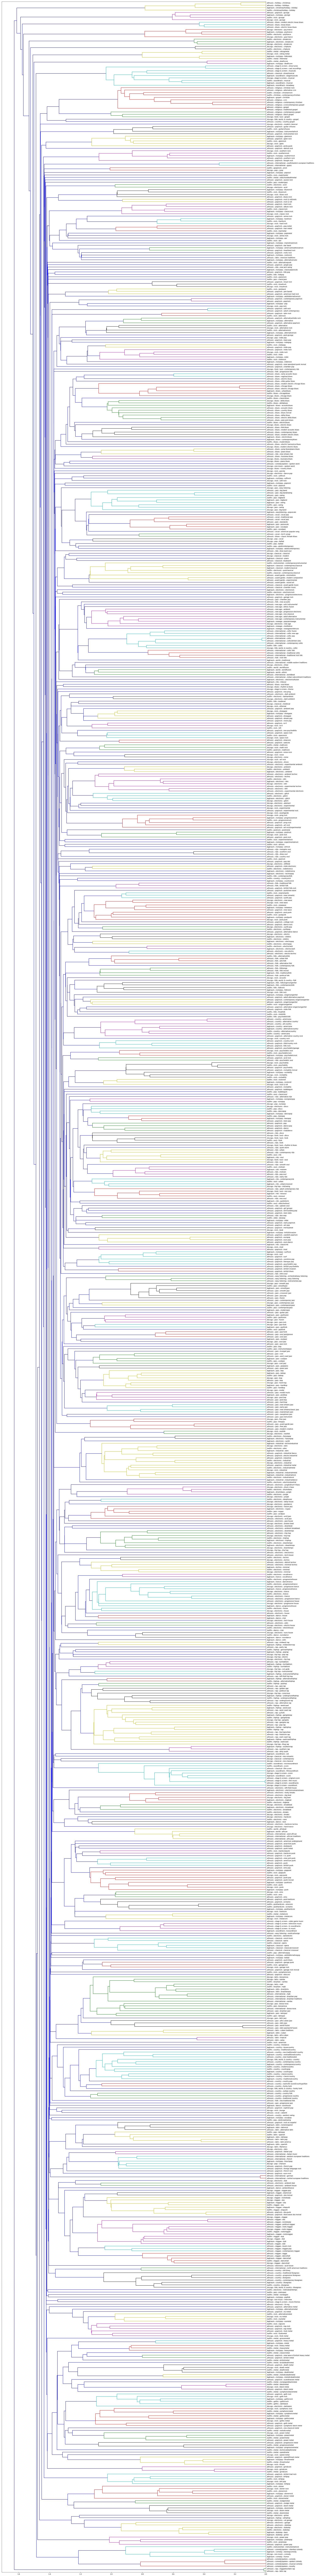

In [17]:
#######################################################################################
#Task 6: Perform a clustering.
#######################################################################################

link = linkage(cos, optimal_ordering=True)

plt.figure(figsize=(30, 300))

dendrogram(link, orientation = 'left', labels = rank, leaf_font_size = 10, show_contracted = True)

plt.savefig("dendrogram.png", bbox_inches = 'tight', dpi = 200)
plt.show()